In [1]:
##%matplotlib ipympl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# On va chercher une corrélation entre l'évolution du volume et du prix de l'action.
## Pour cela on va tracer la courbe du volume et du prix le plus haut d'une action en fonction du temps puis la courbe du volume en fonction du prix.
## Cette démarche a pour but d'appréhender la construction d'un modèle prédictif.

In [3]:
data = pd.read_csv("1y apple.csv")

In [4]:
data.head(5)

,Date,Close/Last,Volume,Open,High,Low
0,10/30/2023,$170.29,51130960,$169.02,$171.17,$168.87
1,10/27/2023,$168.22,58499130,$166.91,$168.96,$166.83
2,10/26/2023,$166.89,70625260,$170.37,$171.3775,$165.67
3,10/25/2023,$171.10,57156960,$171.88,$173.06,$170.65
4,10/24/2023,$173.44,43816640,$173.05,$173.67,$171.45


In [5]:
data.dtypes

Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

In [6]:
data.Date = pd.to_datetime(data.Date)

In [7]:
data.dtypes

Date          datetime64[ns]
Close/Last            object
Volume                 int64
Open                  object
High                  object
Low                   object
dtype: object

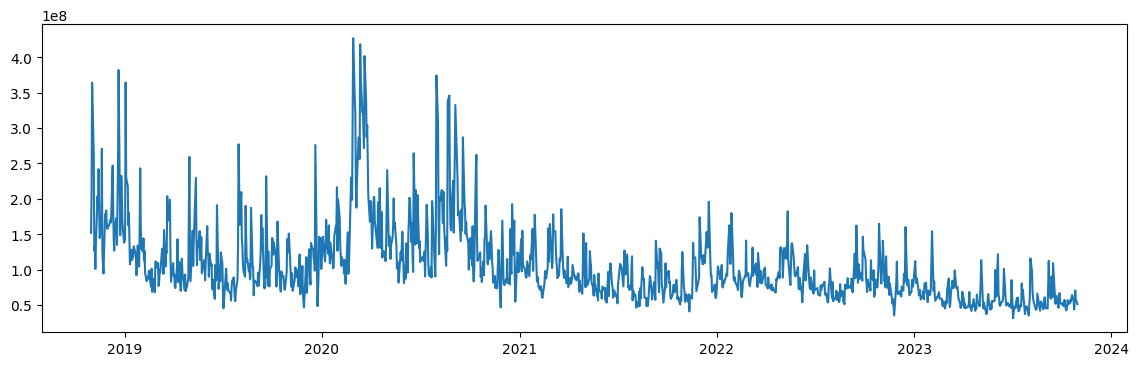

In [8]:
plt.figure(figsize=(14,4))
plt.plot(data["Date"], data["Volume"])
plt.show()

### comment il y a des $ dans les colonnes, on va créer une nouvelle colonne sans les dollars

In [9]:
data["highnew"] = data["High"].str.replace('$','')

In [10]:
data.head(5)

,Date,Close/Last,Volume,Open,High,Low,highnew
0,2023-10-30,$170.29,51130960,$169.02,$171.17,$168.87,171.17
1,2023-10-27,$168.22,58499130,$166.91,$168.96,$166.83,168.96
2,2023-10-26,$166.89,70625260,$170.37,$171.3775,$165.67,171.3775
3,2023-10-25,$171.10,57156960,$171.88,$173.06,$170.65,173.06
4,2023-10-24,$173.44,43816640,$173.05,$173.67,$171.45,173.67


In [11]:
data.dtypes

Date          datetime64[ns]
Close/Last            object
Volume                 int64
Open                  object
High                  object
Low                   object
highnew               object
dtype: object

In [12]:
data.highnew = pd.to_numeric(data.highnew)

In [13]:
data.dtypes

Date          datetime64[ns]
Close/Last            object
Volume                 int64
Open                  object
High                  object
Low                   object
highnew              float64
dtype: object

In [14]:
data["Date"]

0      2023-10-30
1      2023-10-27
2      2023-10-26
3      2023-10-25
4      2023-10-24
          ...    
1252   2018-11-06
1253   2018-11-05
1254   2018-11-02
1255   2018-11-01
1256   2018-10-31
Name: Date, Length: 1257, dtype: datetime64[ns]

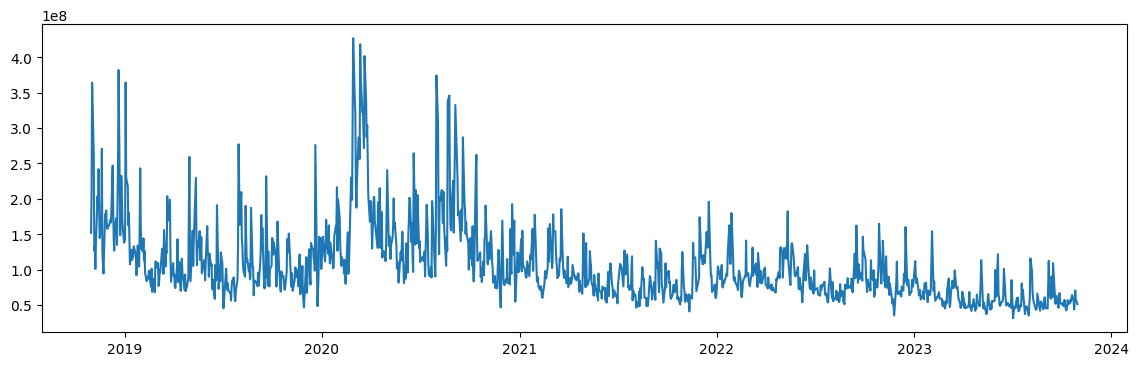

In [15]:
plt.figure(figsize=(14,4))
x = data["Date"]
y = data["Volume"]
plt.plot(x, y)


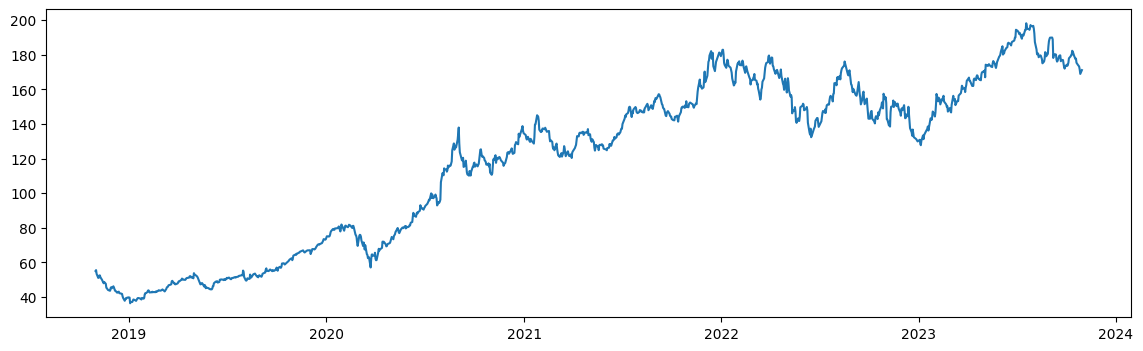

In [16]:
plt.figure(figsize=(14,4))
plt.plot(data["Date"], data["highnew"])

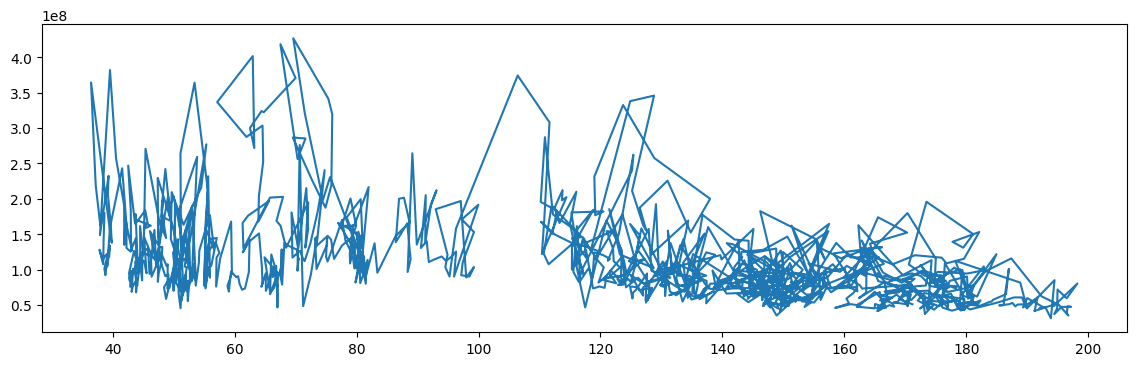

In [17]:
plt.figure(figsize=(14,4))
plt.plot(data["highnew"], data["Volume"])
plt.show()

# Lissage des courbes

In [18]:
data1 = pd.read_csv("1y apple.csv")
data1.Date = pd.to_datetime(data1.Date)
data1["highnew"] = data1["High"].str.replace('$','')
data1.highnew = pd.to_numeric(data1.highnew)
#on a copié un data1 pour modifier directement cette Dataframe

In [19]:
d = data["Volume"].to_list()
for i in range(len(d) - 1):
    d[i] = (d[i] + d[i-1])/2
data["Volumelisse"] = d

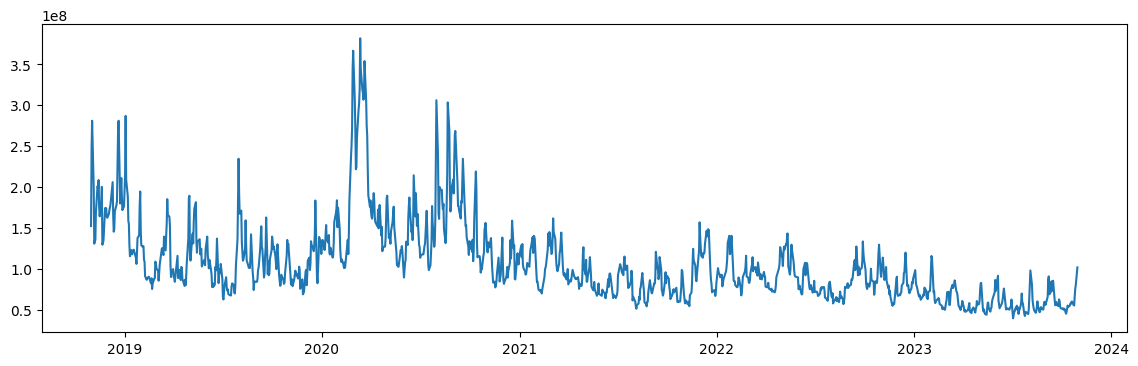

In [20]:
data.head()
plt.figure(figsize=(14,4))
x = data["Date"]
y = data["Volumelisse"]
plt.plot(x, y)


#### Ce n'est pas encore assez lissé à notre goût. On va créer une fonction pouyr itérer ce processus à data1.

#### On va itérer ce processus plusieurs fois afin de vraiment lisser la fonction :

In [21]:
def lissagevolume(DataFrame):
    d = DataFrame["Volume"].to_list()
    for i in range(len(d) - 1):
        d[i] = (d[i] + d[i-1])/2
    DataFrame["Volume"] = d

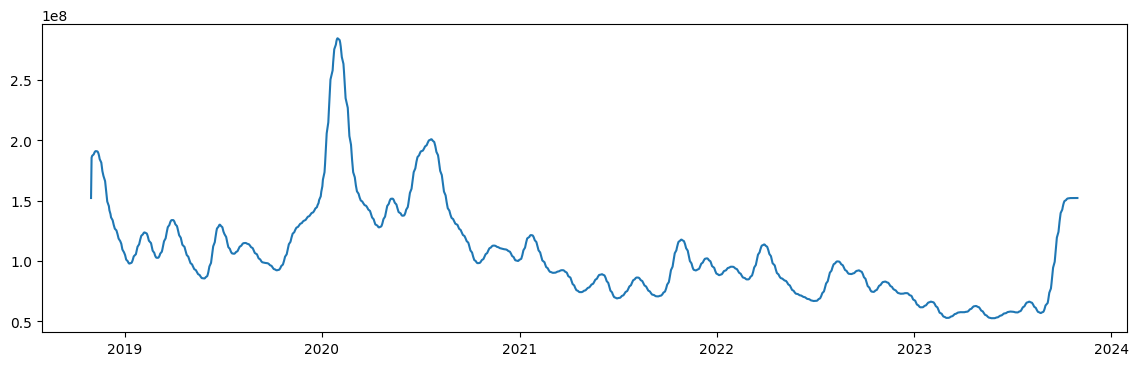

In [22]:
i = 0
while i < 30:
    i= i+1
    lissagevolume(data1)
plt.figure(figsize=(14,4))
x = data1["Date"]
y = data1["Volume"]
plt.plot(x, y)


### Traçons highnew (prix le plus élevé des actions) en fonction du temps

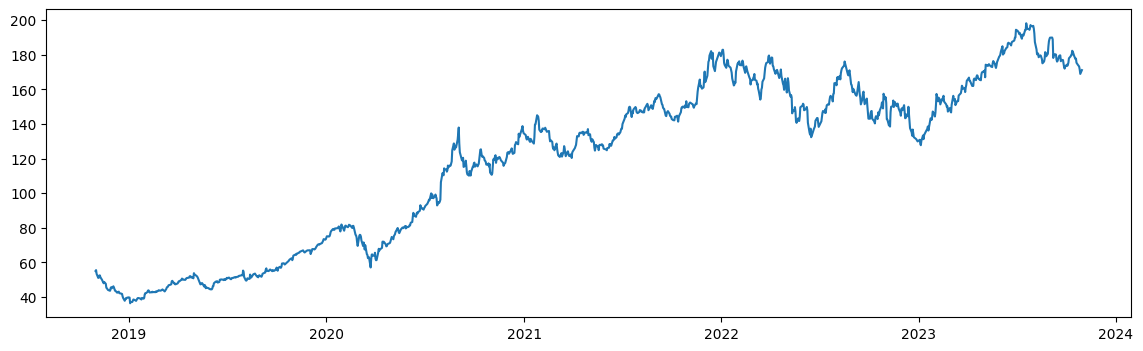

In [23]:
plt.figure(figsize=(14,4))
x = data["Date"]
y = data["highnew"]
plt.plot(x, y)

#### on lisse la courbe du prix le plus haut des actions pour éliminer les perturbations

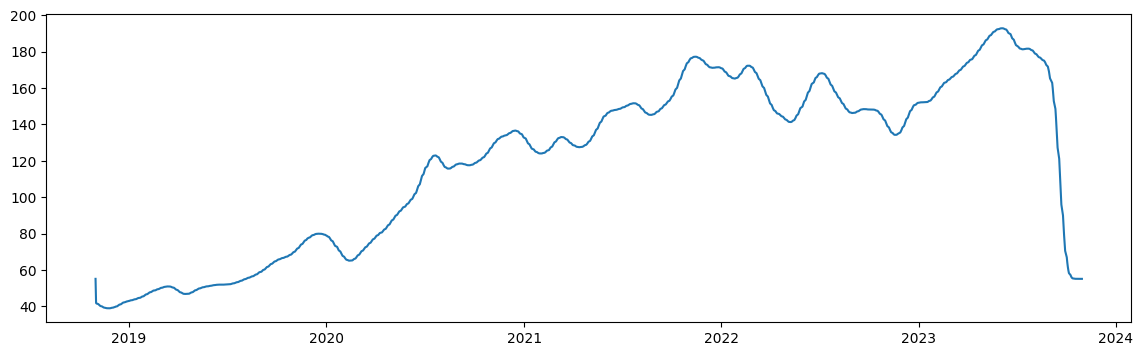

In [24]:
def lissagehigh(DataFrame):
    d = DataFrame["highnew"].to_list()
    for i in range(len(d) - 1):
        d[i] = (d[i] + d[i-1])/2
    DataFrame["highnew"] = d

i = 0
while i < 30:
    i= i+1
    lissagehigh(data1)
plt.figure(figsize=(14,4))
x = data1["Date"]
y = data1["highnew"]
plt.plot(x, y)

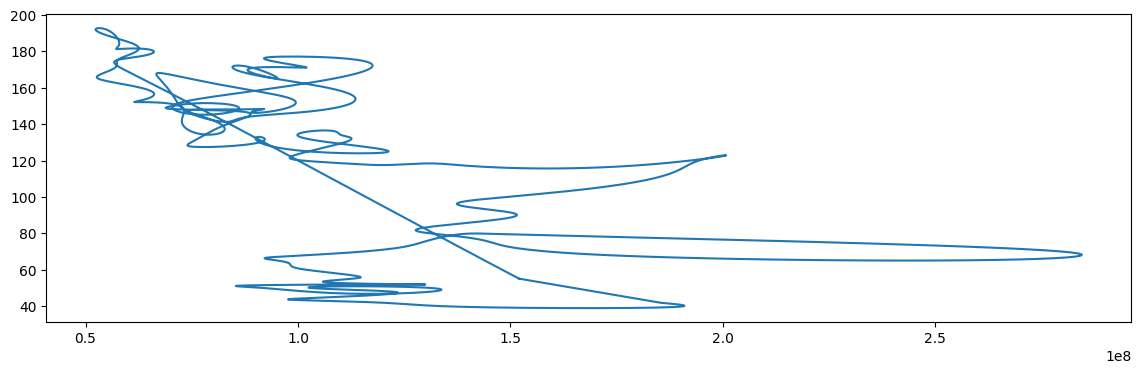

In [25]:
plt.figure(figsize=(14,4))
x = data1["Volume"]
y = data1["highnew"]
plt.plot(x, y)

## on pensait vraiment qu'il y aurait une relation de proportionnalité entre le volume et le prix le plus élevé d'une action, on pensait que lisser les deux courbes permetterait d'éliminer le bruit et les petites perturbations => mais même en lissant (beaucoup) les courbes, la corrélation entre les deux jeux de données ne paraît pas évidente ... 

# À différentes échelles (sur un an seulement)

In [68]:
datanew = data[(data["Date"].dt.year >2022)]

In [69]:
len(datanew)

208

##### en effet la bourse dort le weekend !! ;)

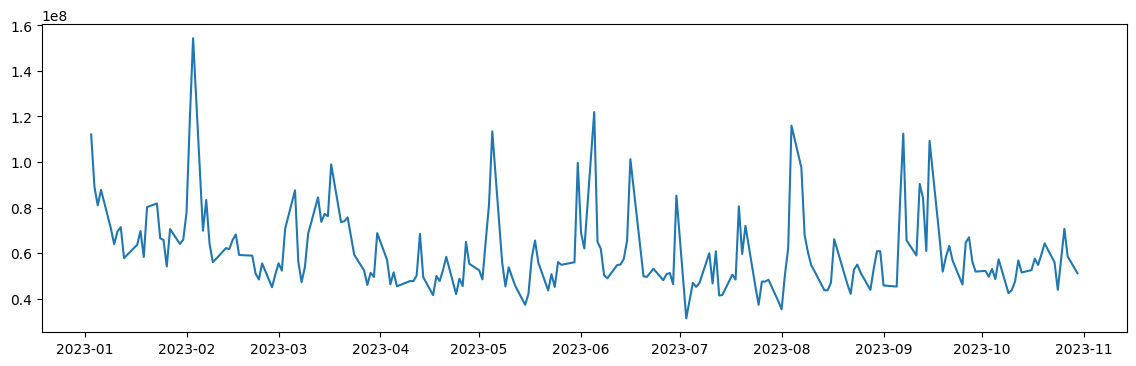

In [70]:
plt.figure(figsize=(14,4))
x = datanew["Date"]
y = datanew["Volume"]
plt.plot(x, y)

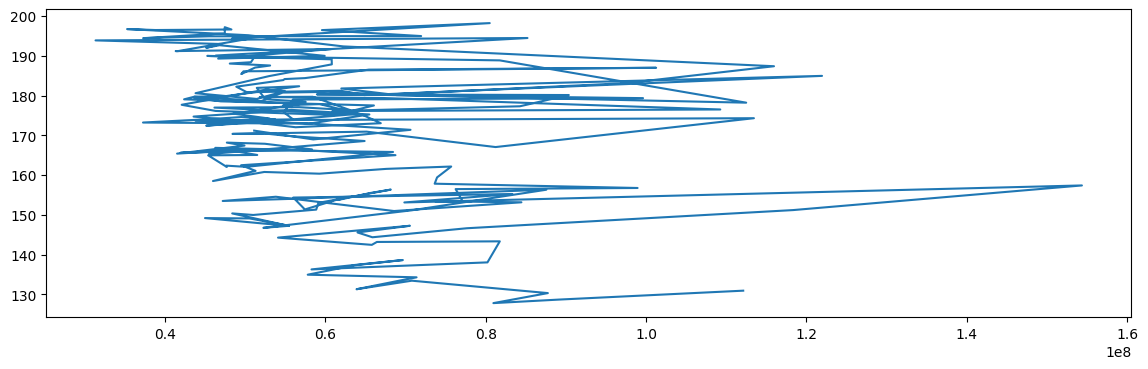

In [71]:
plt.figure(figsize=(14,4))
x = datanew["Volume"]
y = datanew["highnew"]
plt.plot(x, y)

### N'étant toujours pas satisfait de notre corrélation (inexistente ...), nous avons décidé de regarder les écarts relatifs de la variation du volume et du prix le plus haut des actions 

In [72]:
listvol = datanew['Volume'].to_list()
for i in range(len(listvol)-1):
    listvol[i] = ((listvol[i+1] - listvol[i])/listvol[i])
listvol[len(listvol)-1] = listvol[len(listvol)-2]
datanew['Volume'] = listvol

listhigh = datanew['highnew'].to_list()
for i in range(len(listhigh)-1):
    listhigh[i] = ((listhigh[i+1] - listhigh[i])/listhigh[i])
listhigh[len(listhigh)-1] = listhigh[len(listhigh)-2]
datanew['highnew'] = listhigh

datanew['Volume']



/var/folders/rh/l7k3rbgn2r19g5073_27bs8r0000gn/T/ipykernel_68071/2249681511.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['Volume'] = listvol
/var/folders/rh/l7k3rbgn2r19g5073_27bs8r0000gn/T/ipykernel_68071/2249681511.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['highnew'] = listhigh


0      0.144104
1      0.207287
2     -0.190701
3     -0.233398
4      0.277599
         ...   
203    0.239634
204   -0.077398
205    0.100675
206    0.258141
207    0.258141
Name: Volume, Length: 208, dtype: float64

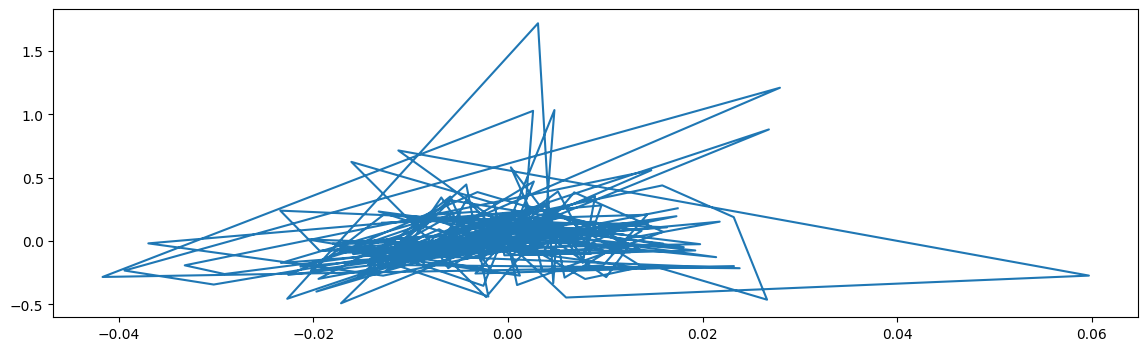

In [75]:
plt.figure(figsize=(14,4))
x = datanew["highnew"]
y = datanew["Volume"]
plt.plot(x, y)

### on remarque que beaucoup de valeurs se situent entre -0.02 et + 0.02 de manière simultanée (ie pour un volume compris dans cette échelle de valeur, la variation du maximum est aussi compris dans cette échelle). On peut créer un compteur qui compte combien de fois cela arrive. 